In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
data = pd.read_excel('ENB2012_data.xlsx')

In [2]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## (i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
data.astype(bool).sum(axis=0)

X1    768
X2    768
X3    768
X4    768
X5    768
X6    768
X7    720
X8    720
Y1    768
Y2    768
dtype: int64

In [7]:
corr = data.corr()
corr

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


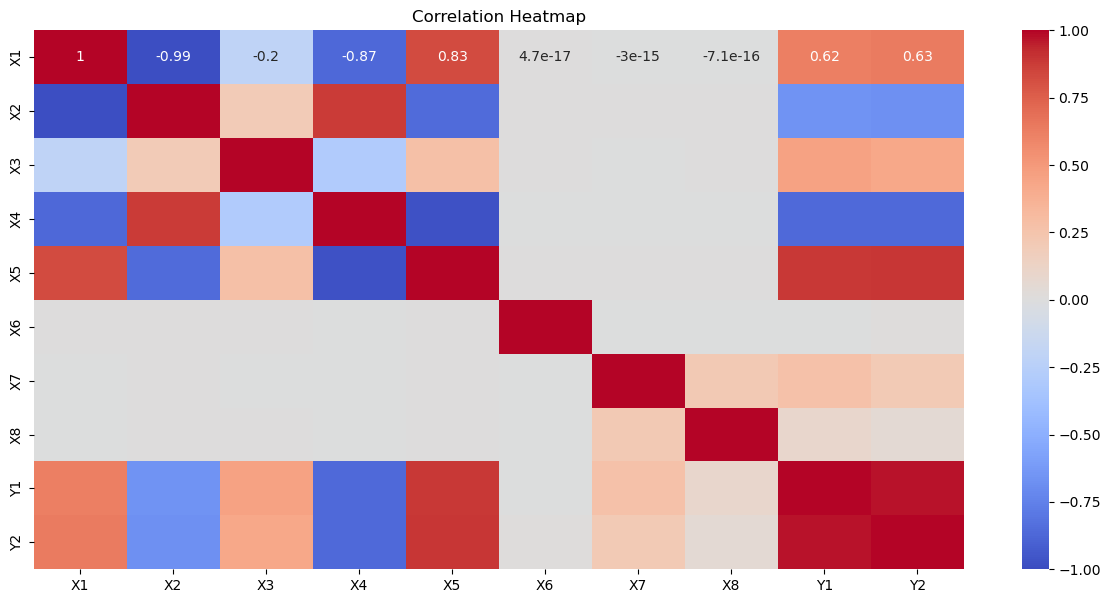

In [8]:
corr = data.corr()
plt.figure(figsize=(15,7))
corr_fig = sns.heatmap(corr,annot = True,cmap = 'coolwarm',vmin = -1 ,vmax = 1)
corr_fog = corr_fig.set_title('Correlation Heatmap')

<Axes: >

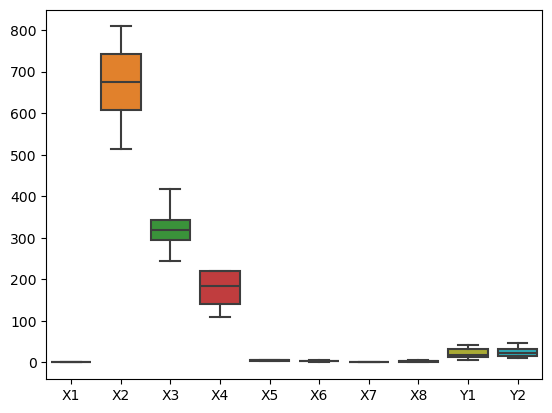

In [9]:
sns.boxplot(data)

## (ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [11]:
x = data.iloc[:, 0:8]
y = data.loc[:, 'Y1']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.20, random_state = 1)

x_train = np.array(x_train).reshape(614,8)
y_train = np.array(y_train).reshape(614,1)
x_test = np.array(x_test).reshape(154,8)
y_test = np.array(y_test).reshape(154,1)

## (iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

#### Forward Propogation


In [14]:
def forward_propagation(x_train, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = (np.multiply(m, x_train).sum(axis = 1) + c).reshape(614,1)
    return predictions

#### Defining Cost Function

In [16]:
def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

#### Gradient Descent for Backpropagation

In [18]:
def backward_propagation(x_train, y_train, predictions):
    derivatives = dict()
    df = (y_train - predictions) * -1
    dm = np.mean(np.multiply(x_train, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives


#### Update the Parameters

In [20]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

#### Train the Data

In [22]:

def train(x_train, y_train, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    # # np.random.seed(100000000)
    # # parameters["m"] = np.random.rand(8) * -1 
    # parameters["m"] = np.zeros(8) * -1
    parameters["m"] = np.array((-6.37407416e+01 ,-6.05688962e-02 , 3.49986636e-02, -4.77837799e-02,4.26317534e+00,  1.20564188e-02,  1.97264330e+01 , 2.46058848e-01)) 
    parameters["c"] = np.array(-90)* -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(x_train, parameters)
        
        #cost function
        cost = cost_function(predictions, y_train)
        loss.append(cost)
        # print("Iteration = {}, Loss = {}".format(i+1, cost))
     
        #back propagation
        derivatives = backward_propagation(x_train, y_train, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters

In [23]:
parameters = train(x_train, y_train, 0.00001, 20000)

<Figure size 640x480 with 0 Axes>

In [24]:
print(parameters)

{'m': array([-6.37479700e+01, -6.77973127e-02,  2.77702471e-02, -5.50121964e-02,
        4.25594692e+00,  4.82800228e-03,  1.97192046e+01,  2.38830431e-01]), 'c': 89.97669784272017}


### Predicting Test_input

In [26]:
m = parameters['m']
c = parameters['c']
test_predictions = (np.multiply(m, x_test).sum(axis = 1) + c)

### error

In [28]:
cost_1 = mean_squared_error(y_test, test_predictions)
RMSE_1 = np.sqrt(cost_1)
r2_1 = r2_score(y_test,test_predictions)
print(cost_1,RMSE_1,r2_1)

11.399322639635212 3.3762882933237814 0.8865622026742492


## train a linear regression model using the sklearn library on the training dataset.

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_,lr.intercept_)

[[-6.37407416e+01 -6.05688962e-02  3.49986636e-02 -4.77837799e-02
   4.26317534e+00  1.20564188e-02  1.97264330e+01  2.46058848e-01]] [81.32119712]


### predict value

In [32]:
predicted_value = lr.predict(x_test)

In [33]:
cost_2 = mean_squared_error(y_test, predicted_value)
RMSE_2 = np.sqrt(cost_2)
r2_2 = r2_score(y_test,predicted_value)
print(cost_2,RMSE_2,r2_2)

10.220113142263587 3.1968911683483356 0.898296840967786


## train ridge and lasso regression model using the sklearn library on the training dataset

In [35]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(x_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_predictions = best_ridge.predict(x_test)


In [36]:
cost_3 = mean_squared_error(y_test, predicted_value)
RMSE_3 = np.sqrt(cost_3)
r2_3 = r2_score(y_test,ridge_predictions)
print(cost_3,RMSE_3,r2_3)

10.220113142263587 3.1968911683483356 0.898130259449974


In [37]:

lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(x_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_predictions = best_lasso.predict(x_test)

In [38]:
cost_4 = mean_squared_error(y_test, predicted_value)
RMSE_4 = np.sqrt(cost_4)
r2_4 = r2_score(y_test,lasso_predictions)
print(cost_4,RMSE_4,r2_4)

10.220113142263587 3.1968911683483356 0.8933852041905078


## (iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). 

In [40]:
x_with_constant = sm.add_constant(x_train)

In [41]:
model = sm.OLS(y_train, x_with_constant)
result = model.fit()
result.params

array([ 8.13211971e+01, -6.37407416e+01, -6.05688962e-02,  3.49986636e-02,
       -4.77837799e-02,  4.26317534e+00,  1.20564188e-02,  1.97264330e+01,
        2.46058848e-01])

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     998.8
Date:                Mon, 23 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:42:34   Log-Likelihood:                -1513.8
No. Observations:                 614   AIC:                             3044.
Df Residuals:                     606   BIC:                             3079.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.3212     20.632      3.941      0.0

#### R2 score

1) Manual linear regression model. =  0.8865622026742492
2) sklearn linear regression model =  0.898296840967786
3) Ridge regression model          =  0.898130259449974
4) Lasso regression model          =  0.8933852041905078

#### MSE and RMSE

1) Manual linear regression model. = 11.399322639635212    , 3.3762882933237814
2) sklearn linear regression model = 10.220113142263587    , 3.1968911683483356
3) Ridge regression model          = 10.220113142263587    , 3.1968911683483356
4) Lasso regression model          = 10.220113142263587    , 3.1968911683483356

#### Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

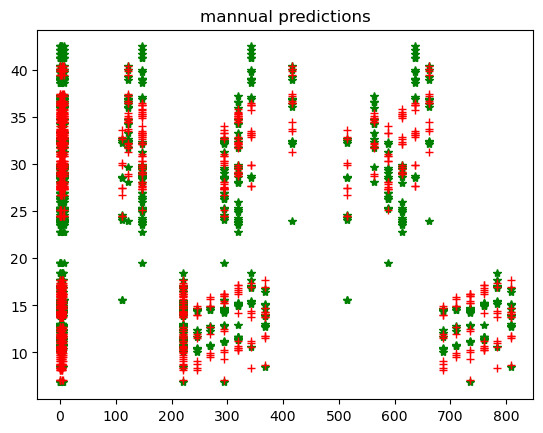

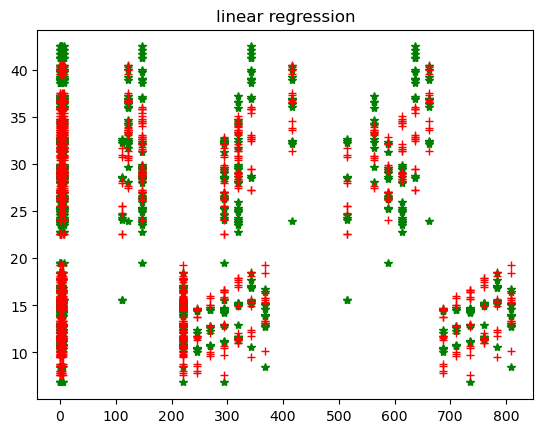

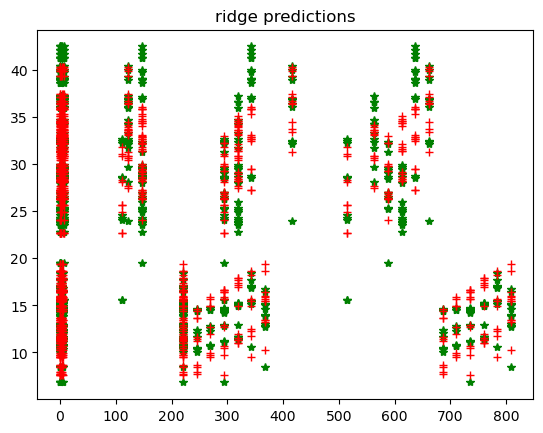

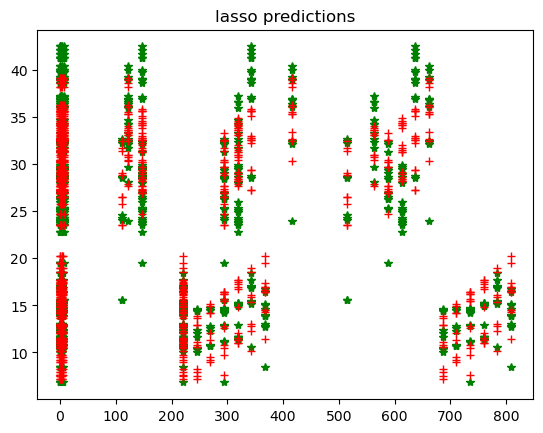

In [48]:

plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, test_predictions, "+", color = "red")
plt.title('mannual predictions')
plt.show()

plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title('linear regression')
plt.show()

plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, ridge_predictions, "+", color = "red")
plt.title('ridge predictions')
plt.show()

plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, lasso_predictions, "+", color = "red")
plt.title('lasso predictions')
plt.show()

## (v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

linear regression and reidge have allmost same r2score and error and lassaga is slightly less than them so they both  are good for the predictions
when we look at ols regression result we find out that x6 coeff has high probablity value so which means it is not affection the result that much so if we remove x6 then the r2score will also get increased


In [51]:
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = data['Y1']

In [52]:
ridge_coefficients = pd.Series(best_ridge.coef_.flatten(), index=X.columns)
lasso_coefficients = pd.Series(best_lasso.coef_.flatten(), index=X.columns)
print("\nRidge Coefficients:")
print(ridge_coefficients.sort_values(ascending=False))

print("\nLasso Coefficients:")
print(lasso_coefficients.sort_values(ascending=False))

# Propose Recommendations
print("\nRecommendations for Energy Efficiency:")
if 'X1' in ridge_coefficients.index and ridge_coefficients['X1'] > 0:
    print("- Optimize wall thickness or material (X1) to improve heating load efficiency.")
if 'X3' in ridge_coefficients.index and ridge_coefficients['X3'] > 0:
    print("- Consider reducing roof area (X3) or adding better insulation.")
if 'X4' in ridge_coefficients.index and ridge_coefficients['X4'] > 0:
    print("- Adjust glazing (X4) or use energy-efficient window materials.")


Ridge Coefficients:
X7    19.689897
X5     4.441280
X8     0.245942
X3     0.034576
X6     0.011547
X4    -0.042298
X2    -0.050020
X1   -55.389651
dtype: float64

Lasso Coefficients:
X7    19.007278
X5     5.564558
X8     0.249340
X3     0.033005
X2     0.018717
X6     0.000070
X1    -0.000000
X4    -0.005621
dtype: float64

Recommendations for Energy Efficiency:
- Consider reducing roof area (X3) or adding better insulation.
